In [1]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import unicodedata
import en_core_web_sm
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from textblob import TextBlob
import random
#from pandas_profiling import ProfileReport   
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [125]:
df=pd.read_csv('C:/Users/anagha.bhople/Desktop/Sentiment Analysis/preprocess_womens_clothing_reviews.csv')

In [126]:
def get_ROC(y_test, y_pred):
    
    # Compute ROC and plot curve
    
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    #plt.figure(figsize=(8,8))
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    
def get_ROC_multiclass(y_test, y_pred):
    
    #Compute ROC and plot curve for three classes
    
    n_classes=3
    # roc curve
    fpr = dict()
    tpr = dict()
    aucroc=dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_pred[:, i])
        aucroc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label='class {} (AUC = {:0.2f})'.format(i, aucroc[i] ))

    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc="best")
    plt.title("ROC curve")
    plt.show()


def get_Precision_Recall(y_test, y_pred):
    
    # Compute Precision-Recall and plot curve
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    area = auc(recall, precision)
    print("Area Under Curve: %0.2f" % area)
    plt.clf()
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example: AUC=%0.2f' % area)
    plt.legend(loc="lower left")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    
    
def get_Precision_Recall_multiclass(y_test, y_pred):
    
    precision = dict()
    recall = dict()
    area=dict()
    n_classes=3
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])
        area[i] = auc(precision[i], recall[i])
        plt.plot(recall[i], precision[i], lw=2, label='class {} (AUC = {:0.2f})'.format(i, area[i]))
        

    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()
        
    
def get_Confusion_Matrix(y_test, y_pred):
    
    # Compute and plot Confusion Matrix 
    
    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
        xticklabels='auto', yticklabels='auto')
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.show()
    

In [127]:
def RandomForestBinaryClassifier(X_train, y_train, X_test, y_test):
    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    Confusion_matrix = confusion_matrix(y_test, y_pred)
    Classification_report = classification_report(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    Accuracy_score = accuracy_score(y_test, y_pred)
    print('Accuracy Score: {}'.format(Accuracy_score))
    F1_score = f1_score(y_test, y_pred)
    print('F1 Score: {}'.format(F1_score))
    Average_precision = average_precision_score(y_test, y_pred)
    print('Average precision-recall score: {}'.format(Average_precision))
    get_Confusion_Matrix(y_test, y_pred)
    get_Precision_Recall(y_test, y_pred)
    get_ROC(y_test, y_pred)
    return Confusion_matrix, Classification_report

#RandomForestBinaryClassifier(X_train, y_train, X_test, y_test)

In [128]:
def LogisticRegression_binary_classification(X_train, y_train, X_test, y_test):
    logisticRegr = LogisticRegression()
    
    logisticRegr.fit(X_train, y_train)
    
    predictions = logisticRegr.predict(X_test)
    Confusion_matrix = confusion_matrix(y_test, predictions)
    Classification_report = classification_report(y_test, predictions)
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test, predictions))
    Accuracy_score = accuracy_score(y_test, predictions)
    print('Accuracy Score: {}'.format(Accuracy_score))
    F1_score = f1_score(y_test, predictions)
    print('F1 Score: {}'.format(F1_score))
    Average_precision = average_precision_score(y_test, predictions)
    print('Average precision-recall score: {}'.format(Average_precision))
    get_Confusion_Matrix(y_test, predictions)
    get_Precision_Recall(y_test, predictions)
    get_ROC(y_test, predictions)
    return Confusion_matrix, Classification_report

#LogisticRegression_binary_classification(X_train, y_train, X_test, y_test)

In [129]:
glove_vectors = dict()

In [130]:
%%time

file = open('C:/Users/anagha.bhople/Desktop/Sentiment Analysis/GloVe Word Embedding/glove/glove.6B.100d.txt', encoding='utf-8')

for line in file:
    values = line.split()
    
    word  = values[0]
    vectors = np.asarray(values[1:])
    glove_vectors[word] = vectors
    
file.close()

Wall time: 12.5 s


In [132]:
glove_vectors

{'the': array(['-0.038194', '-0.24487', '0.72812', '-0.39961', '0.083172',
        '0.043953', '-0.39141', '0.3344', '-0.57545', '0.087459',
        '0.28787', '-0.06731', '0.30906', '-0.26384', '-0.13231',
        '-0.20757', '0.33395', '-0.33848', '-0.31743', '-0.48336',
        '0.1464', '-0.37304', '0.34577', '0.052041', '0.44946', '-0.46971',
        '0.02628', '-0.54155', '-0.15518', '-0.14107', '-0.039722',
        '0.28277', '0.14393', '0.23464', '-0.31021', '0.086173', '0.20397',
        '0.52624', '0.17164', '-0.082378', '-0.71787', '-0.41531',
        '0.20335', '-0.12763', '0.41367', '0.55187', '0.57908', '-0.33477',
        '-0.36559', '-0.54857', '-0.062892', '0.26584', '0.30205',
        '0.99775', '-0.80481', '-3.0243', '0.01254', '-0.36942', '2.2167',
        '0.72201', '-0.24978', '0.92136', '0.034514', '0.46745', '1.1079',
        '-0.19358', '-0.074575', '0.23353', '-0.052062', '-0.22044',
        '0.057162', '-0.15806', '-0.30798', '-0.41625', '0.37972',
        '0

In [133]:
len(glove_vectors)

400000

In [134]:
glove_vectors.get('jacket')

array(['-0.56571', '0.10531', '0.33735', '-0.53618', '0.38384', '0.6183',
       '0.83152', '0.45505', '-0.70729', '0.57993', '0.036655', '0.22178',
       '0.30446', '0.4519', '0.51488', '0.41423', '0.49724', '-0.61685',
       '0.69438', '-1.5288', '0.0064925', '-0.20458', '-0.08334',
       '-0.43909', '0.98079', '0.92262', '-0.99104', '-1.4146', '-0.2108',
       '-1.2479', '0.15514', '0.062322', '-0.29364', '-0.23457',
       '0.14654', '0.84512', '-0.35526', '0.22167', '0.27923', '0.44881',
       '0.60797', '-0.48149', '0.5678', '-0.14535', '-1.0322', '-0.70283',
       '-0.017959', '0.5779', '0.49321', '-0.77552', '0.092406', '0.5572',
       '-0.066641', '0.90886', '-0.3325', '-1.2964', '0.056288', '0.4056',
       '0.92706', '0.54278', '-0.00082259', '0.965', '-0.50606',
       '0.83612', '0.21056', '-0.66467', '0.7647', '-0.19121', '-0.19102',
       '0.31346', '0.1477', '-0.096551', '-0.062611', '-0.092771',
       '0.010748', '0.98719', '0.52872', '0.143', '0.40392', '0.14

In [201]:
x = u'hi hello'
vec_shape = 100

In [221]:
def get_vec(x):
    arr = np.zeros(vec_shape)
    text = str(x).split()
    
    for t in text:
        print(t)
        try:
            vec = glove_vectors.get(t).astype(float)
            arr = arr + vec
        except:
            pass
    print(arr)
    #arr = arr.reshape(1, -1)[0]
    #print(arr)
    print(len(arr/len(text)))
    
    return arr/len(text)

In [222]:
get_vec(x)

hi
hello
[ 0.41128    0.63611    1.58383   -0.45822   -0.46454   -0.60977
  0.377312   0.6207     0.4847585  0.186494   1.03607   -0.335752
  0.23273    0.148945   0.95252    0.73915    0.4878897  0.66799
  0.150986   1.06769   -0.00848    0.89561   -0.83721   -0.03462
  0.52922    1.68506   -0.04933   -1.00648    1.18851    0.279227
 -1.091306   1.091444   2.01172    1.23882    0.02145    0.37533
  0.29281   -0.32993   -0.0271    -1.74307    0.973101  -0.280056
 -1.10475    0.09854   -0.134609  -0.82222   -0.60106    0.898066
  0.10652   -0.785824  -2.05709    0.96363    0.14432   -0.84149
 -1.1815    -1.19797    0.885812   2.05473    0.41872   -0.3965
 -0.146056   0.85795   -1.90225   -0.38531   -0.00509    0.53802
  0.6151     0.74977    0.83402   -0.12826    0.236458   0.17647
 -0.270644  -1.74343   -0.488543   1.75532    1.75625    0.03153
 -0.86952   -0.45883    2.06752   -1.28588    0.17293    0.86382
 -1.74039    0.042768  -0.08043   -0.69579    0.178789   0.0911
  0.556607   1

array([ 0.20564   ,  0.318055  ,  0.791915  , -0.22911   , -0.23227   ,
       -0.304885  ,  0.188656  ,  0.31035   ,  0.24237925,  0.093247  ,
        0.518035  , -0.167876  ,  0.116365  ,  0.0744725 ,  0.47626   ,
        0.369575  ,  0.24394485,  0.333995  ,  0.075493  ,  0.533845  ,
       -0.00424   ,  0.447805  , -0.418605  , -0.01731   ,  0.26461   ,
        0.84253   , -0.024665  , -0.50324   ,  0.594255  ,  0.1396135 ,
       -0.545653  ,  0.545722  ,  1.00586   ,  0.61941   ,  0.010725  ,
        0.187665  ,  0.146405  , -0.164965  , -0.01355   , -0.871535  ,
        0.4865505 , -0.140028  , -0.552375  ,  0.04927   , -0.0673045 ,
       -0.41111   , -0.30053   ,  0.449033  ,  0.05326   , -0.392912  ,
       -1.028545  ,  0.481815  ,  0.07216   , -0.420745  , -0.59075   ,
       -0.598985  ,  0.442906  ,  1.027365  ,  0.20936   , -0.19825   ,
       -0.073028  ,  0.428975  , -0.951125  , -0.192655  , -0.002545  ,
        0.26901   ,  0.30755   ,  0.374885  ,  0.41701   , -0.06

In [138]:
get_vec('hello hi how are you').shape

(100,)

In [139]:
df.columns

Index(['Unnamed: 0', 'index', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Review Text Precrocessed', 'Label',
       'Label_3C', 'Review Text no Stopwords', 'tokenized_text'],
      dtype='object')

In [140]:
df['Review Text no Stopwords'].iloc[92]

'shirt catch eye because beautiful love shape design color perfect spring summer some white part unfortunately do not any possibility shirt wear any other way far do not work any jean skirt short usually prefer item more versatility outfit am still fence am go keep not aside seriously great quality shirt beautiful'

In [141]:
%%time
df['Review Vector Golve']=df['Review Text no Stopwords'].apply(lambda x: get_vec(x))

Wall time: 43.2 s


In [223]:
df['Review Vector Golve'].iloc[1]

array([-0.04882452,  0.21499986,  0.33166929, -0.13895428, -0.27509051,
        0.18047411,  0.07053775,  0.20923623,  0.08259849, -0.03671366,
        0.24596271,  0.14875954,  0.24030346, -0.01135317,  0.02605566,
       -0.26989231,  0.0795558 ,  0.23021697, -0.37596506,  0.42071051,
        0.22607374,  0.12480803, -0.04997384, -0.05028883,  0.26173751,
        0.14622411, -0.10980143, -0.55128183,  0.14021297, -0.12571077,
       -0.05110542,  0.44929346,  0.12539731, -0.20640043,  0.15102109,
        0.20634763, -0.04026711, -0.01965585,  0.18299311, -0.20465725,
        0.00160429, -0.23818758,  0.01217598, -0.3608612 , -0.20707777,
       -0.13806381,  0.12540771, -0.20961289,  0.13108551, -0.7092232 ,
       -0.0068257 , -0.06355197,  0.18984583,  0.62035074, -0.3632758 ,
       -1.95392546, -0.05706138,  0.00668746,  1.13042114,  0.33827243,
       -0.11544808,  0.7246456 , -0.56731097, -0.06188801,  0.55764725,
        0.14914253,  0.26175569,  0.09667931, -0.0475987 , -0.18

In [143]:
X_glo = df['Review Vector Golve']
Y_glo = df['Label']

In [144]:
X_glo.shape

(22642,)

In [218]:
X_glo = np.concatenate(X_glo, axis = 0).reshape(-1, vec_shape)
X_glo

array([[ 0.11033   ,  0.31443949,  0.188914  , ..., -0.4904912 ,
         0.074302  ,  0.443516  ],
       [-0.04882452,  0.21499986,  0.33166929, ..., -0.28494877,
         0.26113799,  0.16518147],
       [-0.30209835,  0.23252035,  0.19312835, ..., -0.32502093,
         0.39924077,  0.07507555],
       ...,
       [-0.1736921 ,  0.20833243,  0.11014557, ..., -0.37855381,
         0.44587843,  0.31623   ],
       [-0.11680827,  0.29703354,  0.184855  , ..., -0.21259934,
         0.344306  ,  0.15140751],
       [-0.29034375,  0.1739675 ,  0.0967555 , ..., -0.42905175,
        -0.03927292,  0.28126733]])

In [216]:
X_glo.shape, Y_glo.shape

((22642, 100), (22642,))

In [151]:
w2v_Y=df['Label']
w2v_X=X_glo
w2vX_train, w2vX_test, w2vy_train, w2vy_test = train_test_split(w2v_X,w2v_Y, test_size=.20, random_state=0)

In [154]:
w2vX_train.shape 

(18113, 100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 394  667]
 [ 188 3280]]
              precision    recall  f1-score   support

           0       0.68      0.37      0.48      1061
           1       0.83      0.95      0.88      3468

    accuracy                           0.81      4529
   macro avg       0.75      0.66      0.68      4529
weighted avg       0.79      0.81      0.79      4529

Accuracy Score: 0.8112166041068669
F1 Score: 0.8846931894807822
Average precision-recall score: 0.8274721280288686


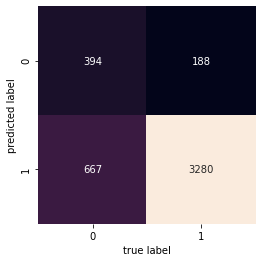

Area Under Curve: 0.91


<ipython-input-126-d3da9126ecf1>:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


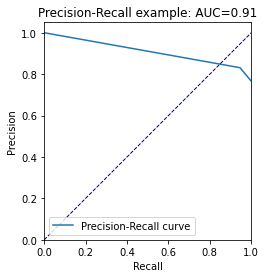

<ipython-input-126-d3da9126ecf1>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


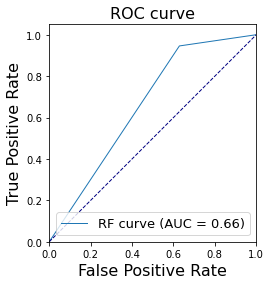

(array([[ 394,  667],
        [ 188, 3280]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.68      0.37      0.48      1061\n           1       0.83      0.95      0.88      3468\n\n    accuracy                           0.81      4529\n   macro avg       0.75      0.66      0.68      4529\nweighted avg       0.79      0.81      0.79      4529\n')

In [156]:
LogisticRegression_binary_classification(w2vX_train, w2vy_train, w2vX_test, w2vy_test)

# Glove with spacy

In [157]:
import spacy
import en_core_web_lg
nlp_glove = en_core_web_lg.load()

total_vectors = len(nlp_glove.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 684831


In [158]:
doc_glove_vectors = np.array([nlp_glove(str(doc)).vector for doc in df['Review Text Precrocessed']])

In [159]:
doc_glove_vectors.shape

(22642, 300)

In [162]:
g_Y=df['Label']
g_X=doc_glove_vectors
gX_train, gX_test, gy_train, gy_test = train_test_split(g_X, g_Y, test_size=.20, random_state=101)

[[ 547  484]
 [ 162 3336]]
              precision    recall  f1-score   support

           0       0.77      0.53      0.63      1031
           1       0.87      0.95      0.91      3498

    accuracy                           0.86      4529
   macro avg       0.82      0.74      0.77      4529
weighted avg       0.85      0.86      0.85      4529

Accuracy Score: 0.8573636564362994
F1 Score: 0.91172451489478
Average precision-recall score: 0.8686235622127247


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


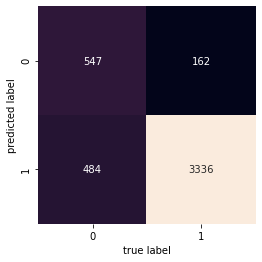

Area Under Curve: 0.93


<ipython-input-126-d3da9126ecf1>:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


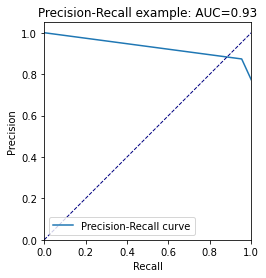

<ipython-input-126-d3da9126ecf1>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


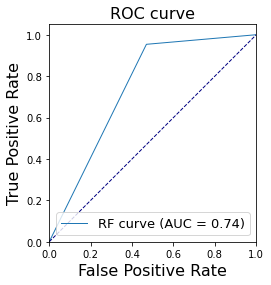

(array([[ 547,  484],
        [ 162, 3336]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.77      0.53      0.63      1031\n           1       0.87      0.95      0.91      3498\n\n    accuracy                           0.86      4529\n   macro avg       0.82      0.74      0.77      4529\nweighted avg       0.85      0.86      0.85      4529\n')

In [163]:
LogisticRegression_binary_classification(gX_train, gy_train, gX_test, gy_test)

In [185]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([df, cluster_labels], axis=1)

,Unnamed: 0,index,Review Text,Rating,Recommended IND,Positive Feedback Count,Review Text Precrocessed,Label,Label_3C,Review Text no Stopwords,tokenized_text,Review Vector Golve,Review Text w2v,Review Text Fast,doc_vector,ClusterLabel
0,0,0,Absolutely wonderful - silky and sexy and comf...,4,1,0,absolutely wonderful silk and sex and comfortable,1,1,absolutely wonderful silk sex comfortable,"['absolutely', 'wonderful', 'silk', 'sex', 'co...","[0.11033, 0.314439492, 0.18891399999999997, -0...","[absolutely, wonderful, silk, sex, comfortable]","[absolutely, wonderful, silk, sex, comfortable]","[0.21019952, 0.2167106, 0.1808492, 0.080462314...",0
1,1,1,Love this dress! it's sooo pretty. i happene...,5,1,4,love this dress -PRON- is soon pretty i happen...,1,1,love dress soon pretty happen find store am gl...,"['love', 'dress', 'soon', 'pretty', 'happen', ...","[-0.048824520000000024, 0.21499986285714287, 0...","[love, dress, soon, pretty, happen, find, stor...","[love, dress, soon, pretty, happen, find, stor...","[0.17828362, 0.14017709, 0.21026725, -0.005707...",1
2,2,2,I had such high hopes for this dress and reall...,3,0,0,i have such high hope for this dress and reall...,0,2,such high hope dress really want work initiall...,"['such', 'high', 'hope', 'dress', 'really', 'w...","[-0.30209834909090905, 0.2325203454545455, 0.1...","[such, high, hope, dress, really, want, work, ...","[such, high, hope, dress, really, want, work, ...","[0.06397822, 0.09609353, 0.22713098, -0.022492...",1
3,3,3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,i love love love this jumpsuit -PRON- is fun f...,1,1,love love love jumpsuit fun flirt fabulous eve...,"['love', 'love', 'love', 'jumpsuit', 'fun', 'f...","[0.07432100000000001, 0.3109484615384615, 0.30...","[love, love, love, jumpsuit, fun, flirt, fabul...","[love, love, love, jumpsuit, fun, flirt, fabul...","[0.13690369, 0.20326898, 0.24687897, 0.075426,...",1
4,4,4,This shirt is very flattering to all due to th...,5,1,6,-PRON- shirt is very flattering to all due to ...,1,1,shirt very flattering all due adjustable front...,"['shirt', 'very', 'flattering', 'all', 'due', ...","[-0.19176157894736842, 0.19453052631578946, 0....","[shirt, very, flattering, all, due, adjustable...","[shirt, very, flattering, all, due, adjustable...","[0.112833425, 0.13594453, 0.20974933, 0.009602...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22637,23481,23481,I was very happy to snag this dress at such a ...,5,1,0,i was very happy to sang this dress at such a ...,1,1,very happy sang dress such great price very ea...,"['very', 'happy', 'sang', 'dress', 'such', 'gr...","[-0.36421339999999996, 0.28500746666666665, 0....","[very, happy, sang, dress, such, great, price,...","[very, happy, sang, dress, such, great, price,...","[0.1070752, 0.1076006, 0.22214122, -0.01093657...",0
22638,23482,23482,"It reminds me of maternity clothes. soft, stre...",3,1,0,-PRON- remind -PRON- of paternity clothe soft ...,0,2,remind paternity clothe soft stretch shiny mat...,"['remind', 'paternity', 'clothe', 'soft', 'str...","[-0.2840959115384615, 0.30182675, 0.2697337692...","[remind, paternity, clothe, soft, stretch, shi...","[remind, paternity, clothe, soft, stretch, shi...","[0.066953465, 0.069250375, 0.28268406, 0.00524...",0
22639,23483,23483,"This fit well, but the top was very see throug...",3,0,1,-PRON- fit well but the top was very see throu...,0,2,fit well top very through never would work am ...,"['fit', 'well', 'top', 'very', 'through', 'nev...","[-0.17369209523809526, 0.20833242857142859, 0....","[fit, well, top, very, through, never, would, ...","[fit, well, top, very, through, never, would, ...","[0.132738, 0.12603106, 0.2365773, -0.012403366...",1
22640,23484,23484,I bought this dress for a wedding i have this ...,3,1,2,i buy this dress for a wedding i have this sum...,0,2,buy dress wedding summer cut unfortunately fit...,"['buy', 'dress', 'wedding', 'summer', 'cut', '...","[-0.11680826829

In [186]:
word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
102,-3.500912,-3.429754,-0.650724,-3.045837,-1.116634,-0.771736,1.847228,-1.468310,-3.621171,0.522045,...,-0.790152,3.130130,-0.593600,0.487275,-0.984313,-1.078805,-0.011270,-0.993429,1.548226,-0.705187
entertain,-0.758771,-0.977269,2.950756,-3.988984,2.778953,1.999400,1.496356,0.462626,-1.022402,1.380673,...,2.073683,-0.353619,-0.394594,-2.301906,-1.831552,1.471954,0.316174,-1.132814,-2.487310,-3.205978
correspond,-0.252117,-0.479355,1.693380,-2.782747,0.372153,1.661764,1.239797,-0.164913,-2.822101,0.484933,...,-0.258911,1.145010,-0.025460,-1.011585,-4.216173,0.934657,0.155768,-1.953977,-1.776202,-2.248970
absurd,0.547357,-0.798133,0.469423,-1.317556,1.513468,0.347399,1.689240,2.117134,-2.586216,2.016926,...,0.574634,0.182780,-0.736409,0.177758,-3.490698,0.448596,2.108791,1.104130,-1.899267,-3.143072
husband,1.018909,1.662336,-1.104464,-0.435954,-1.004493,-0.834599,1.053987,-0.833822,-3.643626,3.799858,...,-0.233349,1.999475,-0.952470,-0.388770,-4.239415,1.897634,0.712510,-0.635545,1.114270,-2.616011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inclination,-0.337099,0.882204,0.511899,-1.153938,-1.109759,-0.448487,1.911786,-1.102281,-3.679856,4.925952,...,0.472621,-0.220162,0.343438,-1.704798,-2.440823,0.162989,-0.654896,-1.012149,2.288843,-3.361170
emerson,0.575753,-0.841709,1.315078,0.605189,0.012296,-1.458149,3.480980,-0.798556,-3.056261,0.779979,...,-0.317911,0.664533,-0.038004,0.193876,-3.980115,1.148507,0.973659,0.641663,0.598946,-3.648971
achieve,-1.395400,-1.490647,2.241789,-3.556730,-1.051561,6.129438,1.586021,0.389118,-0.053707,0.123560,...,0.872085,1.688634,0.148253,-1.722847,-2.044645,-0.883139,-0.483636,0.348630,-0.934777,-2.525672
pm,0.376608,2.215776,-0.028919,-0.486546,-0.339797,0.471887,3.011192,2.057319,-0.420155,2.526603,...,0.438951,0.967492,-0.400844,-1.766862,-2.143944,0.537042,0.541723,-0.454879,-0.041195,-1.220311


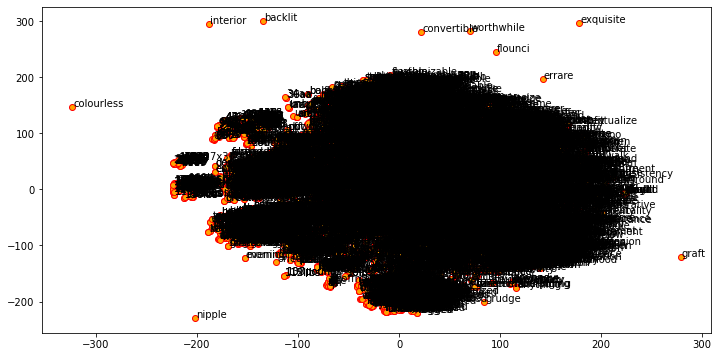

In [193]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors[:-100])
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

# FastText Model

In [164]:
from gensim.models.fasttext import FastText

In [166]:
def tokenize(x):
    x= TextBlob(str(x)).words
    return x
df['Review Text Fast']=df['Review Text no Stopwords'].apply(lambda x: tokenize(x))

In [168]:
# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 50          # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

# sg decides whether to use the skip-gram model (1) or CBOW (0)
ft_model = FastText(df['Review Text Fast'], size=feature_size, window=window_context, 
                    min_count=min_word_count,sample=sample, sg=1, iter=50)

In [169]:
similar_words = {search_term: [item[0] for item in ft_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['love', 'top', 'dress', 'hate', 'color', 'winter', 'most','wear']}
similar_words

{'love': ['great', 'perfect', 'comfortable', 'cut', 'buy'],
 'top': ['shirt', 'pretty', 'cut', 'flow', 'very'],
 'dress': ['wedding', 'slip', 'occasion', 'event', 'beautiful'],
 'hate': ['org', 'relationship', 'wander', 'once', 'out'],
 'color': ['blue', 'more', 'red', 'green', 'love'],
 'winter': ['fall', 'warm', 'spring', 'weather', 'boot'],
 'most': ['always', 'retailer', 'wear', 'find', 'well'],
 'wear': ['plan', 'great', 'buy', 'love', 'comfortable']}

In [170]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    doc = [word for word in doc if word in ft_model.wv.vocab]
    return np.mean(ft_model[doc], axis=0)

df['doc_vector'] = df['Review Text Fast'].apply(document_vector)

<ipython-input-170-c4ab4ad84837>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return np.mean(ft_model[doc], axis=0)


In [171]:
X = list(df['doc_vector'])

In [172]:
f_Y=df['Label']
f_X=X
fX_train, fX_test, fy_train, fy_test = train_test_split(f_X,f_Y, test_size=.20, random_state=101)

[[ 624  407]
 [ 189 3309]]
              precision    recall  f1-score   support

           0       0.77      0.61      0.68      1031
           1       0.89      0.95      0.92      3498

    accuracy                           0.87      4529
   macro avg       0.83      0.78      0.80      4529
weighted avg       0.86      0.87      0.86      4529

Accuracy Score: 0.8684036211084124
F1 Score: 0.9173828666481841
Average precision-recall score: 0.8840916249467221


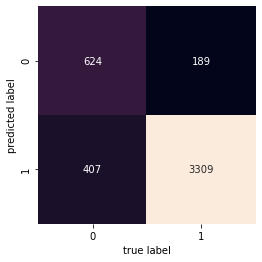

Area Under Curve: 0.94


<ipython-input-126-d3da9126ecf1>:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


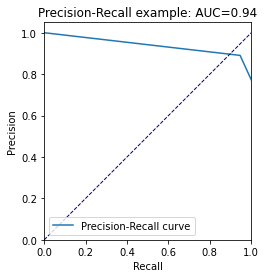

<ipython-input-126-d3da9126ecf1>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


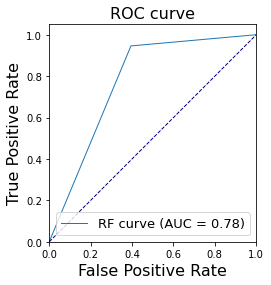

(array([[ 624,  407],
        [ 189, 3309]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.77      0.61      0.68      1031\n           1       0.89      0.95      0.92      3498\n\n    accuracy                           0.87      4529\n   macro avg       0.83      0.78      0.80      4529\nweighted avg       0.86      0.87      0.86      4529\n')

In [173]:
LogisticRegression_binary_classification(fX_train, fy_train, fX_test, fy_test)

# Representation

In [ ]:
#https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa

In [175]:
unique_words = list(set([word for sublist in [doc.split() for doc in df['Review Text no Stopwords']] for word in sublist]))

In [176]:
len(unique_words)

8251

In [177]:
unique_words[:-10]

['102',
 'entertain',
 'correspond',
 'absurd',
 'husband',
 'guarantee',
 'sink',
 'horn',
 'adduct',
 'costly',
 '21',
 'bamboo',
 'magnification',
 'worker',
 'technically',
 'define',
 'metallic',
 'meeting',
 'brushstroke',
 'urban',
 'myo',
 'vacation',
 'worried',
 'aren',
 'mixture',
 'april',
 'upside',
 'acceptable',
 'baseball',
 'successfully',
 'fore',
 'sombre',
 'jumpsuit',
 'hurrah',
 'armscye',
 'swallow',
 'tedious',
 'pitiful',
 'copy',
 'tone',
 'preach',
 'tarso',
 'poly',
 'strain',
 'unfortunate',
 'miniskirt',
 'jurist',
 'transparent',
 '5ft8inches',
 'rename',
 'due',
 'dealing',
 'switzerland',
 'network',
 'nl',
 'leaf',
 '56',
 'sophistica',
 'numerically',
 'tm',
 'canton',
 'nonsense',
 'soon',
 'abruptly',
 'attach',
 'trepidation',
 'ante',
 'bride',
 'model',
 'leathery',
 'strangle',
 'staple',
 'ordinary',
 'dose',
 'plastic',
 'reviewed',
 'overwhelming',
 'fresh',
 'photographer',
 'stronger',
 'mentioning',
 'crazy',
 'gut',
 'island',
 'corodorys

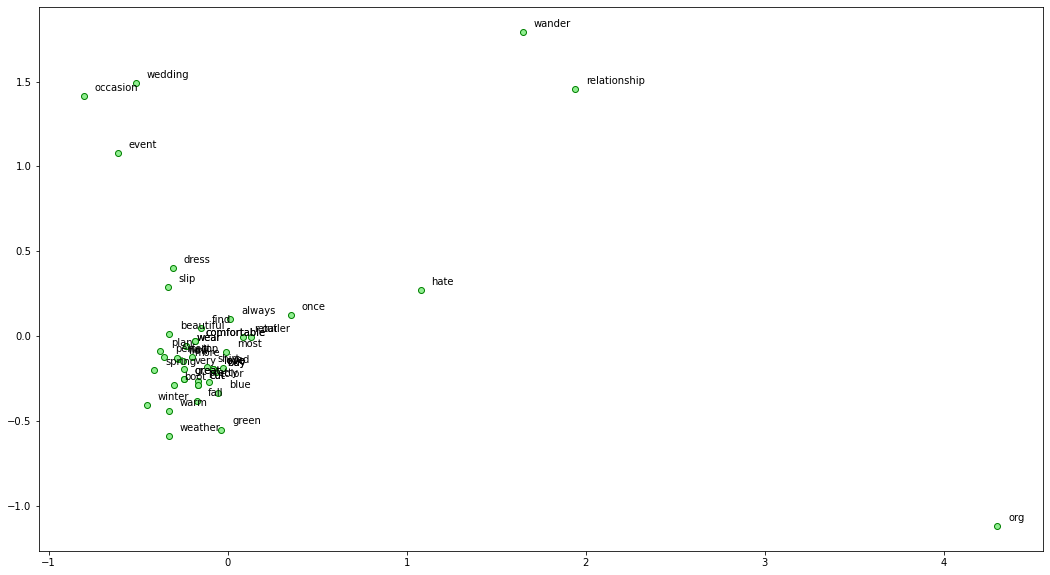

In [181]:
from sklearn.decomposition import PCA

#words = sum([[k] + v for k, v in similar_words.items()], [])
words=unique_words
wvs = ft_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(18, 10))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

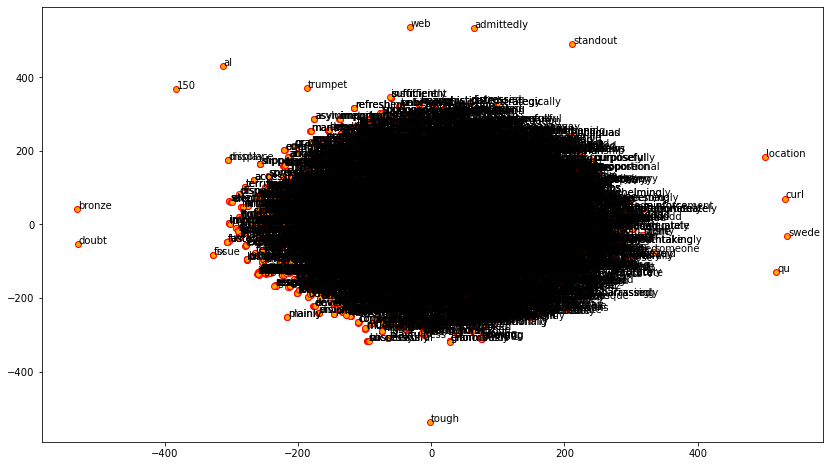

In [196]:
from sklearn.manifold import TSNE

#words = sum([[k] + v for k, v in similar_words.items()], [])
words=unique_words[:-50]
wvs = ft_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [197]:
pip install autoviml

  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49720 sha256=56ad7e74e8e40cef4050b868fc1fa067bd3b561eed97e8a8eeca818b8af646ee
  Stored in directory: c:\users\anagha.bhople\appdata\local\pip\cache\wheels\43\3d\82\e7baffa5e86346c6178d7750dba6e8ef063282a37fc563f8f8
Successfully built emoji


In [198]:
from autoviml.Auto_NLP import Auto_NLP

Imported Auto_NLP version: 0.0.45.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [199]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=7)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\anagha.bhople\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\anagha.bhople\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\anagha.bhople\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\anagha.bhople\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\anagha.bhople\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data

Auto NLP processing on NLP Column: Review Text no Stopwords
Shape of Train Data: 18113 rows
    Shape of Test Data: 4529 rows


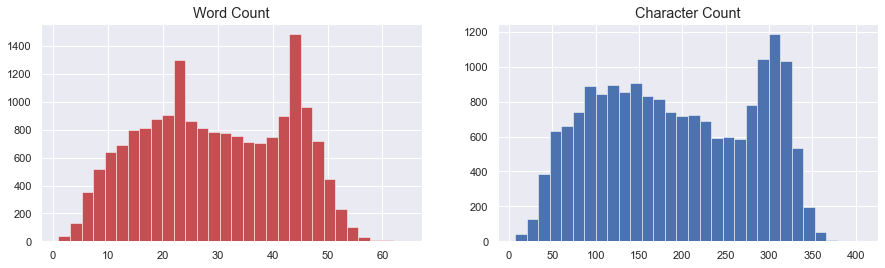

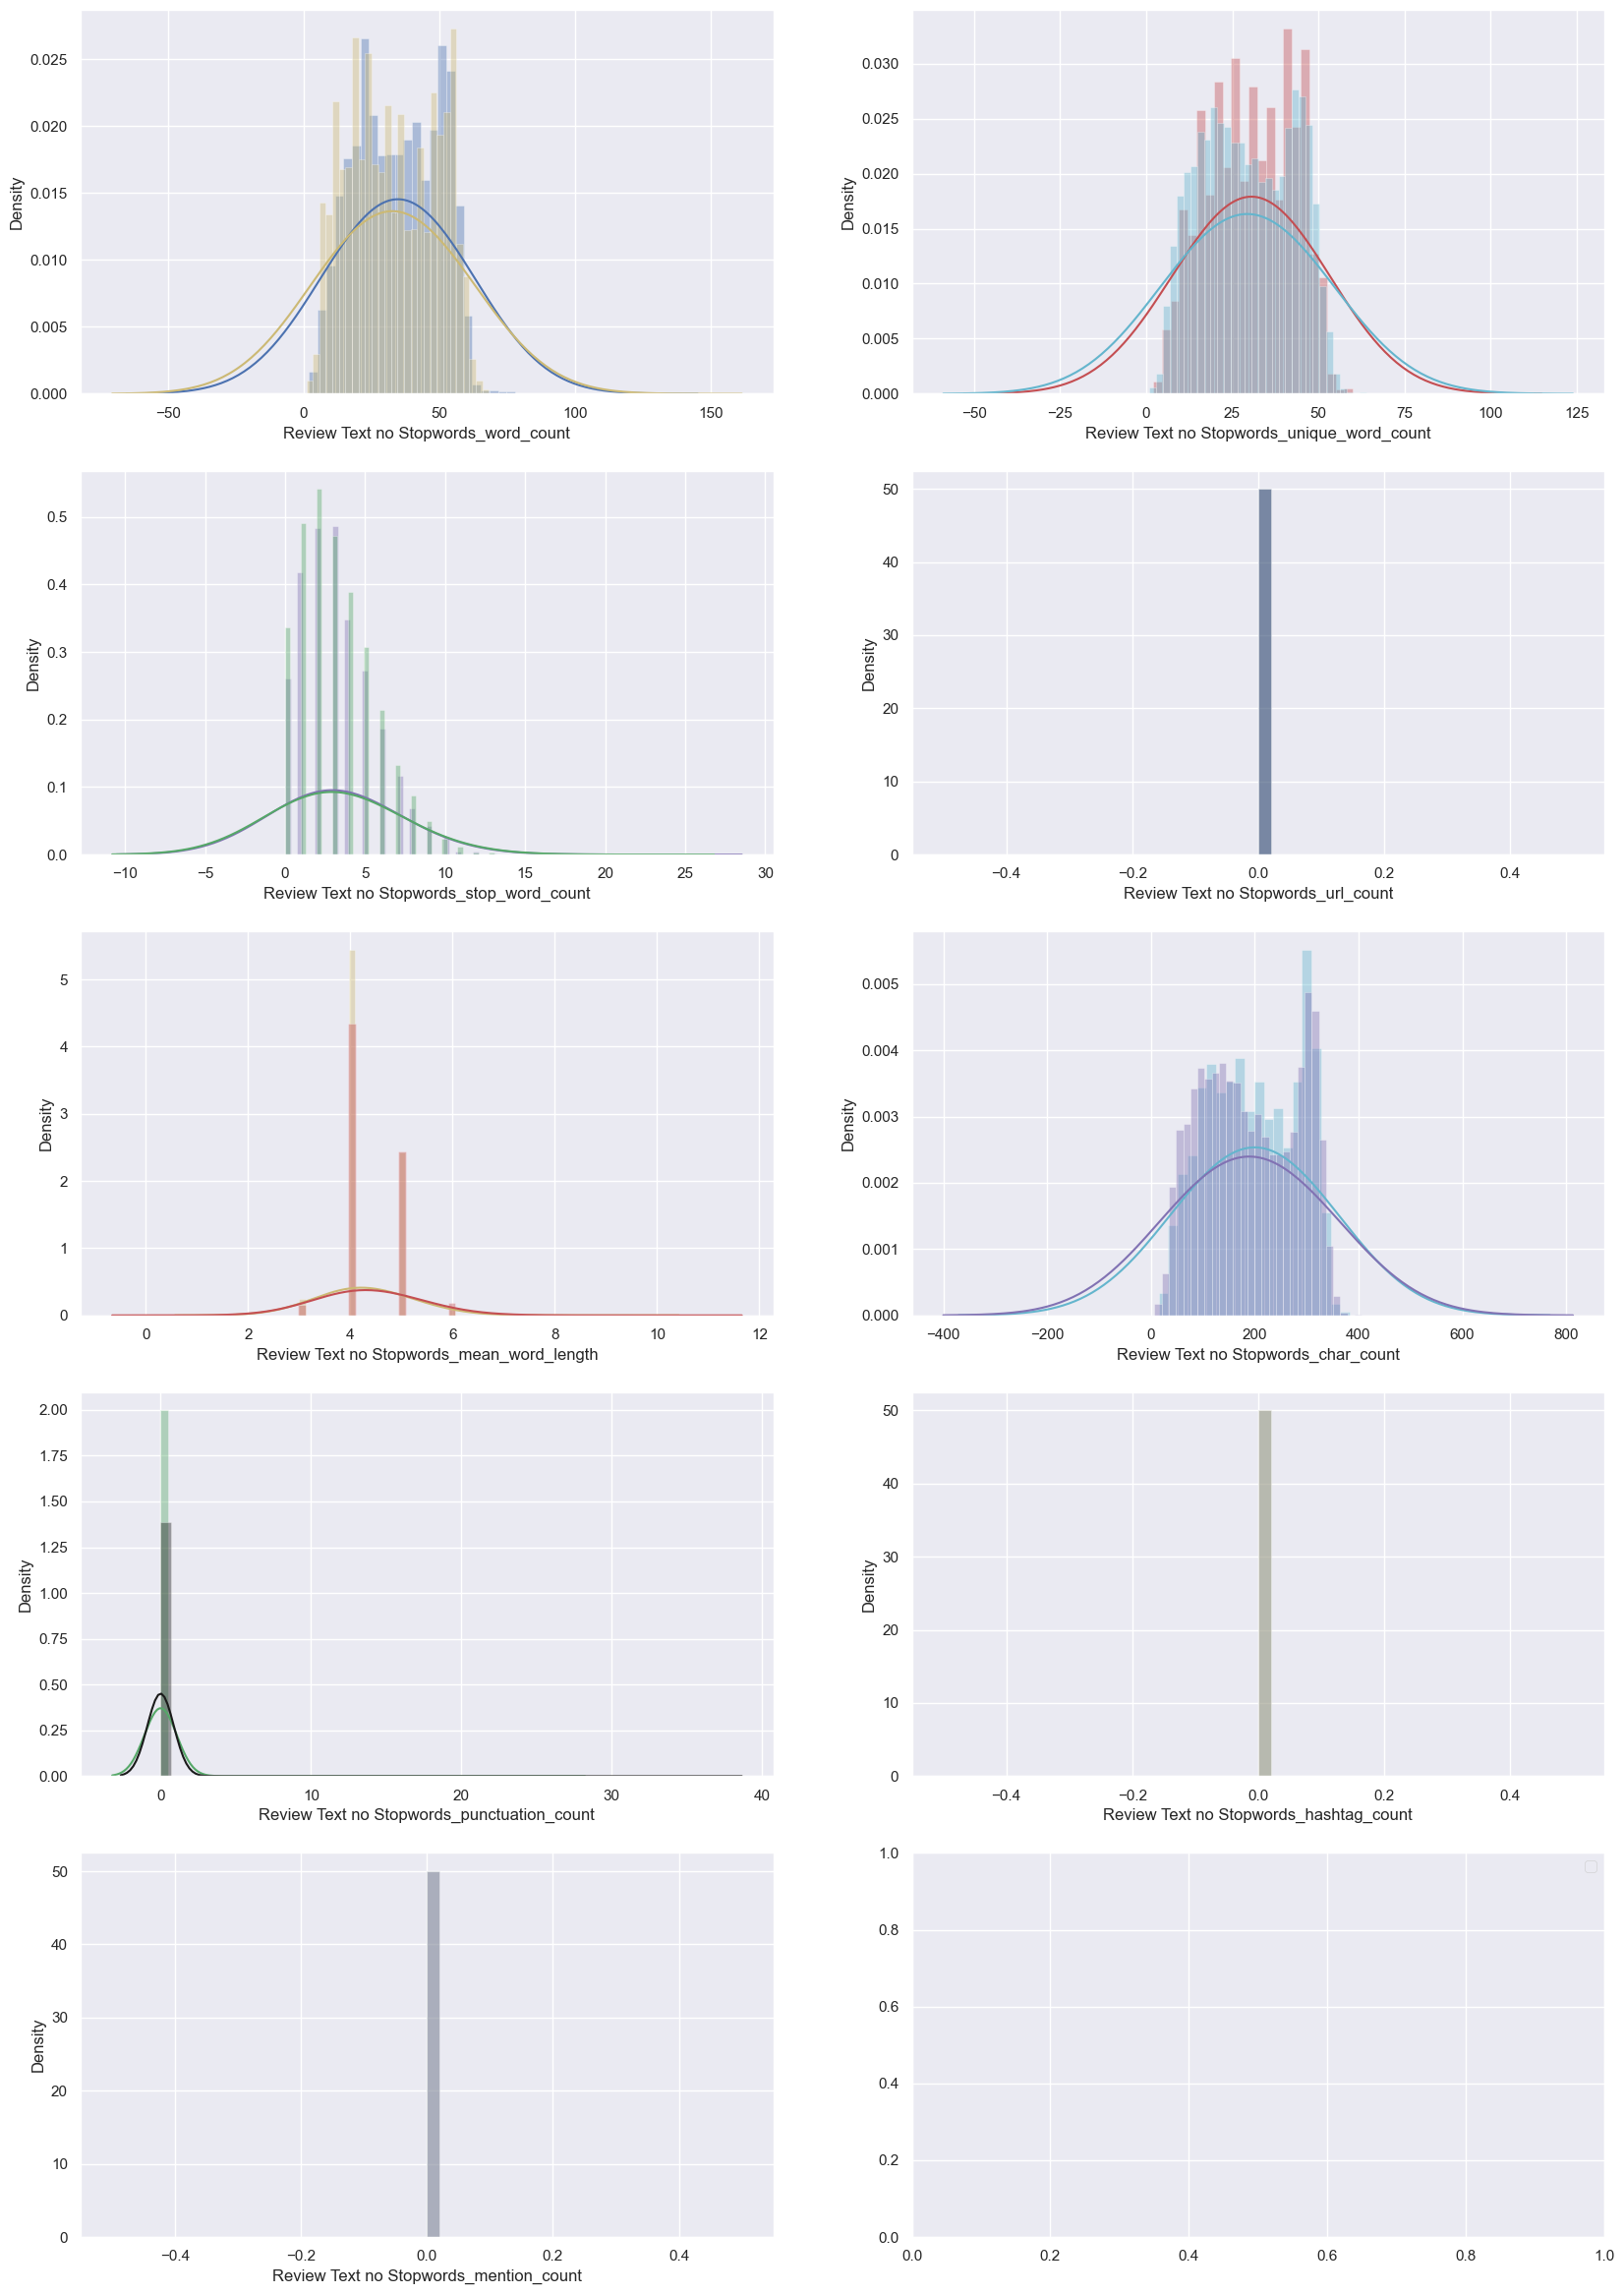

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for Review Text no Stopwords column
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 52 seconds

For target = Label

    For class = 0
Top 200 n-grams
: ['look', 'like', 'do', 'fit', 'love', 'dress', 'top', 'would', 'size', 'fabric', 'return', 'color', 'cut', 'wear', 'small', 'order', 'make', 'back', 'flatter', 'go', 'realli', 'materi', 'larg', 'well', 'think', 'much', 'tri', 'way', 'run', 'want', 'feel', 'becaus', 'qualiti', 'also', 'big', 'short', 'could', 'bodi', 'great', 'shirt', 'beauti', 'work', 'howev', 'nice', 'pretti', 'disappoint', 'design', 'waist', 'long', 'review', 'good', 'pictur', 'buy', 'littl', 'usual', 'model', 'thin', 'no', 'retail', 'shape', 'off', 'these', 'bit', 'tight', 'style', 'unfortun', 'petit', 'length', 'arm', 'onlin', 'price', 'part', 'soft', 'line', 'wide', 'right'

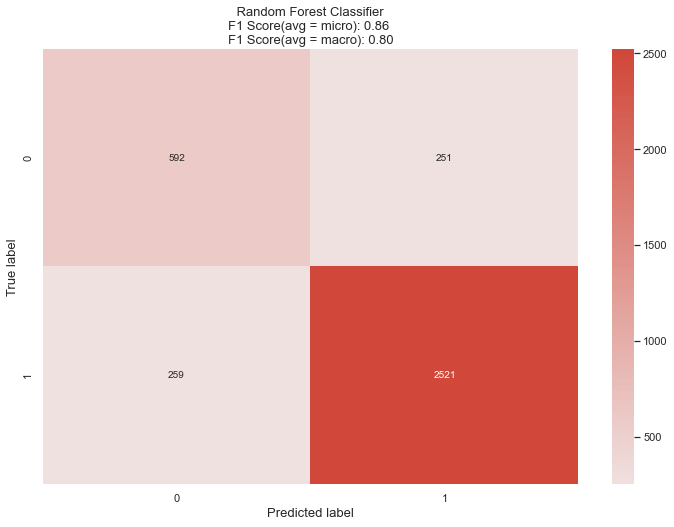

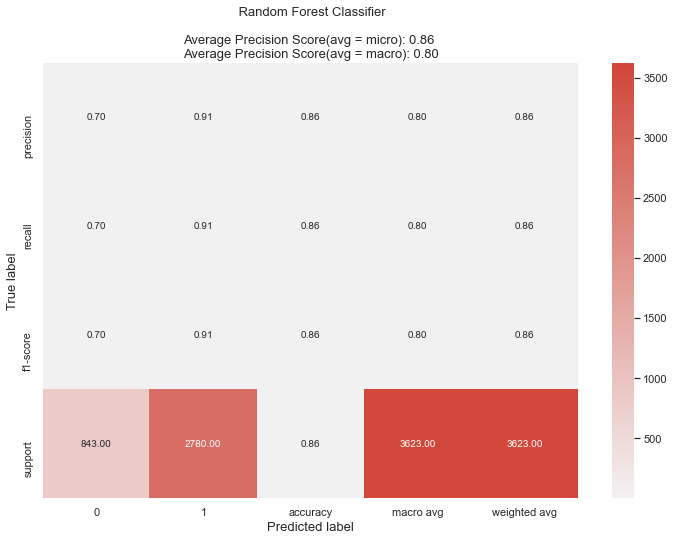

  Now transforming Train data to return as output...
  Transforming Test data to return as output...
Training best Auto_NLP Pipeline on full Train data...will be faster since best params are known
    Returning best Auto_NLP pipeline to transform and make predictions on test data...
Training completed. Time taken for Auto_NLP = 43.2 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [200]:
text, target = "Review Text no Stopwords", "Label"

train_nlp, test_nlp, trans, preds = Auto_NLP(text, X_train, X_test, target, score_type="balanced_accuracy", \
                                             modeltype="Classification", verbose=2, build_model=True)


In [ ]:
# global arr 
# arr= np.zeros(100)

# class glove(object):
#     def __init__(self, word2vec):
#         self.word2vec = word2vec
#         global arr 
#         arr= np.zeros(100)
        
        

#     def fit(self, X2, y2):
        
#         return self
    

#     def transform(self, X2):
#         arr = np.zeros(100)
#         text = str(X2).split()

#         for t in text:
#             #print(t)
#             try:
#                 vec = self.word2vec.get(t).astype(float)
#                 arr = arr + vec
#             except:
#                 pass
#         arr = arr.reshape(1, -1)[0]
#         print(arr.shape)
        
#         lis = np.concatenate(arr, axis = 0).reshape(-1, 100)
#         print(lis.shape)
#         #print("done")
#         return lis
       